# Traffic and Throughput

In this notebook, we will plot out the distribution of packet uploads over the course of an hour as generated by sensors and mules in `schedule_generation.ipynb`. Hopefully we see nice little spikes or something, because that would be expected.

In [7]:
# Import libraries.
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Read in schedule data.
schedule_df = pd.read_csv('prob_data/schedule.csv', skiprows=3)
schedule_df.head()

,sensor_id,mule_id,sample_time,pickup_time,batch_time,data_length
0,697,0,0.0,1.501024,600,128
1,977,0,0.0,1.501024,600,128
2,624,0,0.0,3.501024,600,128
3,638,0,0.0,7.501024,600,128
4,17,0,30.0,30.001024,600,128


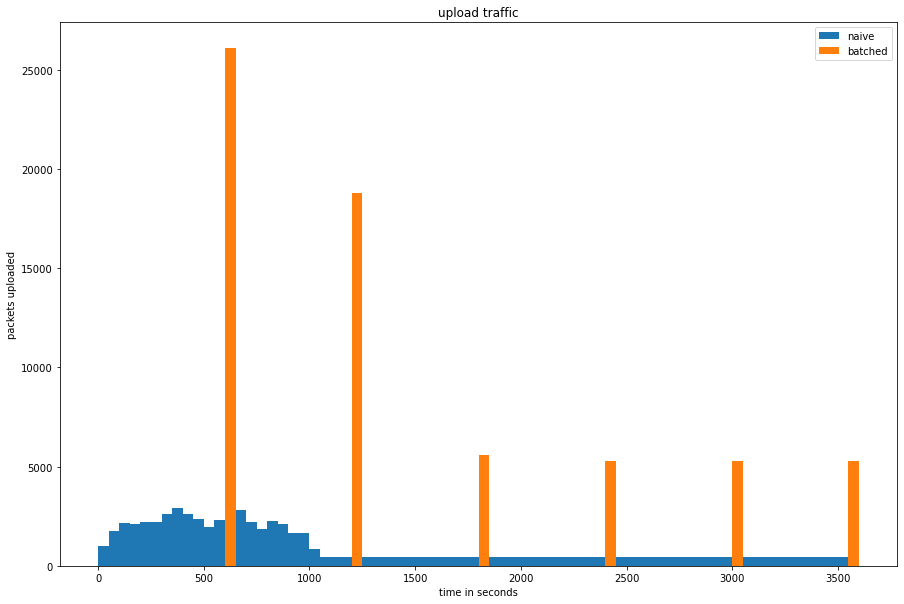

In [12]:
# Plot histogram to show uploads over time
t_grain = 50 # size of each bin
last_upload_time = schedule_df['batch_time'].max()
num_bins = math.ceil(last_upload_time / t_grain)
t_edges = [t * t_grain for t in range(num_bins+1)]

plt.figure(figsize=(15,10))
plt.hist(schedule_df['pickup_time'], bins=t_edges, label='naive')
plt.hist(schedule_df['batch_time'], bins=t_edges, label='batched')
plt.title('upload traffic')
plt.xlabel('time in seconds')
plt.ylabel('packets uploaded')
plt.legend()
plt.show()

Agh. Looks like most of the mules finish walking around after 1000 seconds (i.e. 15-20 minutes) and the rest of the time, the only packets are coming from sensors consistently connected to the mules as they dawdle around their target location. I guess that means I will need to update `probabilistic_trajectories.ipynb` to give mules a new destination after they are close enough to their target destination, whatever "close enough" means. But anyways, it seems like batching is working so that's good!